# **MILESTONE 1 - PHASE 1**

Nama : Krisbiantoro Prabowo

Batch : 008
<hr>

## **1. Description**
### 1.1 Objective

**Milestones 1** ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

<hr>

## **2. Import Libraries**
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.mode.chained_assignment = None 
pd.set_option('display.max_columns', None)

In [345]:
colors = sns.color_palette("Set2")
colors2 = sns.color_palette("Paired")
sns.set_style("whitegrid")

## **3. Data Loading**

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [642]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

In [347]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## **4. Exploratory Data Analysis**
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [348]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


- Dataset terdiri dari 10 Kolom `Numerik` dan 11 Kolom `Kategorik`, dimana salah satu dari kolom `Kategorik` merupakan label/target yang nantinya akan kita gunakan sebagai perbandingan dalam evaluasi model-model machine learning yang telah dikembangkan.

In [643]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### 4.1. Perbandingan Jumlah Nasabah Yang Mengikuti Program Deposito Berjangka

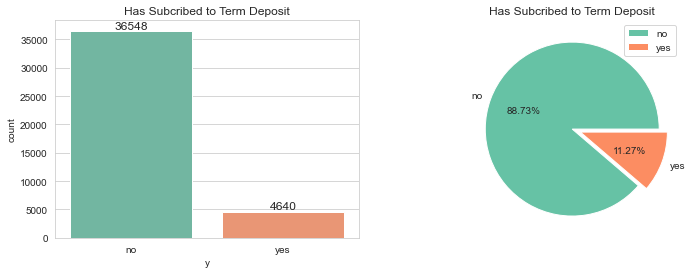

In [350]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
ax = sns.countplot(x='y', data=df, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Has Subcribed to Term Deposit')

plt.subplot(1,2,2)
plt.pie(df['y'].value_counts(), labels=df['y'].unique() ,colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('Has Subcribed to Term Deposit')
plt.legend()
plt.show()

- Dari 41188 daftar nama nasabah yang terdapat pada bank ABC, sebanyak 4640 atau 11.27% mengikuti program deposito berjangka. Sedangkan nasabah lainnya yang berjumlah 36548 atau 88.73% tidak mengikuti program ini. Hal ini menandakan kolom label/target bersifat `imbalance` yang berarti besar kemungknan `f1 score` yang dihasilkan pada salah satu kolom khususnya label yes akan jauh lebih rendah dibandingkan dengan label no.

### 4.2. Perbandingan Pekerjaan Nasabah Yang Mengikuti Program Deposito Berjangka

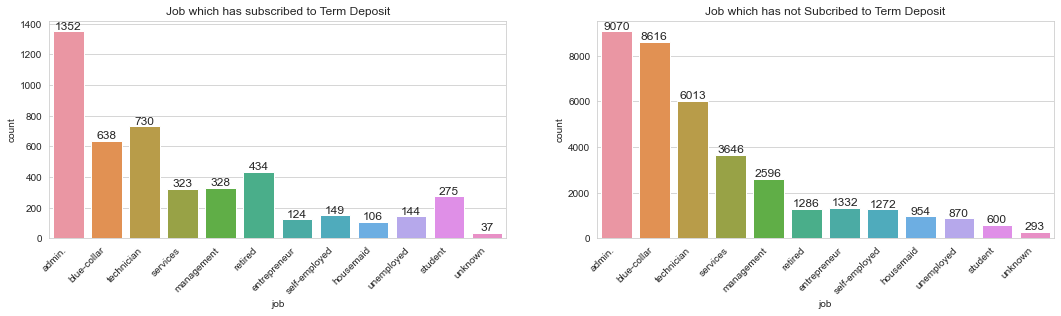

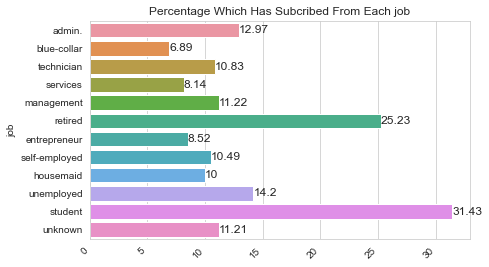

In [650]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
ax = sns.countplot(x='job', data=df.query('y=="yes"'), order=df['job'].value_counts().index)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Job which has subscribed to Term Deposit')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,2,2)
ax = sns.countplot(x='job', data=df.query('y=="no"'), order=df['job'].value_counts().index)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Job which has not Subcribed to Term Deposit')
plt.xticks(rotation=45, ha='right')


###############################

ratio_job = df.query('y=="yes"').value_counts('job')
ratio_job = ratio_job.astype(np.float64)
for i, (k,v) in enumerate(ratio_job.items()):
    ratio_job[k]= (ratio_job[k]/df[(df['job']==k)].value_counts('job')*100).round(2)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
ax = sns.barplot(y=ratio_job.index, x=ratio_job.values, order=df['job'].value_counts().index)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Percentage Which Has Subcribed From Each job')
plt.xticks(rotation=45, ha='right')
plt.show()


- Dari visual diatas, didapatkan informasi bahwa:
    - Banyak pekerjaan yang dilakukan nasabah adalah `admin`, kemudian diikuti oleh `blue-collar`, `technician`, dan yang terakhir adalah `unknown`.
    - Untuk kategori `unknown`, hal ini bisa saja dari pihak nasabah memilih untuk tidak ingin memberi tahu apa pekerjaan yang ia miliki
    - Dari persentase tiap pekerjaan antara mereka yang mengikuti program dan mana yang tidak mengikuti program. `Student` ternyata memiliki rasio yang paling tertinggi hingga 31.43%. Hal ini cukup unik karena umumnya student masih belum memiliki pendapatan yang tetap. Tampaknya dari pihak bank melakukan sebuah promo yang menargetkan kelompok ini dengan minimum deposit yang sangat minim begitupun juga dengan bunga yang cukup tinggi yang dimana tentu saja jumlah maksimal deposit bibatasi. Faktor lain juga bisa dikarenakan kelompok ini di rentang umur mereka, mereka cenderung tertarik mencari ataupun mempelajari bidang keuangan seperti investasi, trading, reksadana, bond, dan lain sebagainya. Sehingga merekapun punya dorongan untuk mencoba mengikuti salah satunya termasuk mengikuti deposito berjangka yang ditawarkan secara khusus untuk kelompok-kelompok ini dari pihak bank
    - Selanjutnya diikuti oleh mereka yang pensiun/`retired`. Hal ini wajar, mengingat mereka yang pensiun cenderung ingin menjaga aset atau keuangan mereka di masa tua, sehingga uang yang telah dihasilkan saat mereka masih aktif bekerja mereka gunakan untuk mengikuti program investasi
    - Hal yang unik terlihat pada `entrepreneur` dimana hanya sekitar 8.52% saja yang mengikuti program deposito berjangka. Mungkin saja banyak faktor yang terjadi seperti, mereka lebih tertarik untuk mengikutinya melalui penyedia layanan bank lainnya yang memiliki promosi/ketentuan yang lebih baik dari bank ABC. Karena biasanya `entreprenur` membuka rekening lebih dari satu bank, dan bisa saja mereka tidak mengikuti program ini karena ditakutkan uang yang mereka simpan diperlukan sewaktu-waktu untuk keperluan usaha mereka
    

In [352]:
df.query("job=='admin.'").value_counts('job')

job
admin.    10422
dtype: int64

### 4.3. Cicilan/Pinjaman Yang Dimiliki Oleh Nasabah

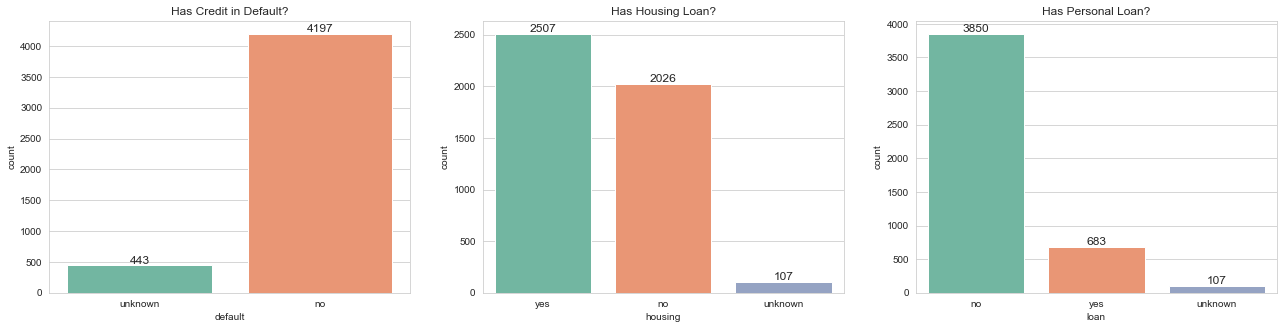

In [353]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
ax = sns.countplot(x='default', data=df.query('y=="yes"'), palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Has Credit in Default?')

plt.subplot(1,3,2)
ax = sns.countplot(x='housing', data=df.query('y=="yes"'), palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Has Housing Loan?')

plt.subplot(1,3,3)
ax = sns.countplot(x='loan', data=df.query('y=="yes"'), palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Has Personal Loan?')

plt.show()

- Nasabah yang mengikuti program deposito berjangka, sebanyak 4197 tidak mengalami permasalahan dalam penggunaan kartu kreditnya. Namun sebanyak 443 tidak diketahui apakah pernah mengalami permasalahan dalam kartu kredit meskipun terjadi di bank lainnya, mungkin ini bisa saja karena pihak nasabah tidak ingin memberi tahu informasi tersebut sehingga dikategorikan dengan unknown. Karena bisa saja ini masih sah-sah diterima oleh bank dengan catatan jika mereka ingin mengaktivasi layanan kredit pada bank ini harus melewati prosedur tertentu.
- lebih dari 50% nasabah atau sebanyak 2507 nasabah telah memiliki cicilan rumah, ini sangat umum terjadi pada era ini, dikarenakan harga rumah yang mahal dan tidak memungkinkanya nasabah untuk membeli rumah secara kontan/cash
- Banyak nasabah yang mengikuti program ini tidak memiliki pinjaman pribadi terhadap pihak-pihak tertentu. Karena bisa saja mereka yang masih punya pinjaman berpikir untuk lebih memilih melunaskan hutangnya terlebih dahulu sebelum mengikuti program ini

### 4.4. Hasil Pada Kampanye Sebelumnya

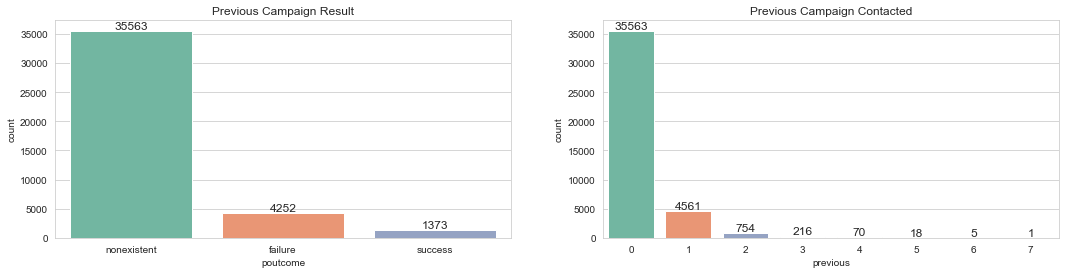

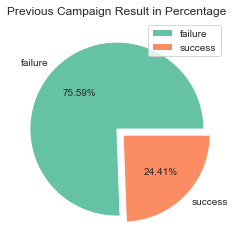

In [355]:
plt.figure(figsize=(18, 4))
plt.subplot(1,2,1)
ax = sns.countplot(x='poutcome', data=df, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Previous Campaign Result')

plt.subplot(1,2,2)
ax = sns.countplot(x='previous', data=df, palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Previous Campaign Contacted')

plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.pie(df.query('poutcome!="nonexistent"').value_counts('poutcome'), labels=df[(df['poutcome']!="nonexistent")].value_counts('poutcome').index ,colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('Previous Campaign Result in Percentage')
plt.legend()

plt.show()

- Dari kampanya yang dilakukan sebelum kampanye ini, nasabah yang dikontak hanya sebanyak 5625 nasabah
- Dimana mayoritas nasabah atau sebanyak 4561 nasabah hanya dikontak satu kali dalam kampanye ini
- Hanya terdapat satu nasabah yang dihubungi hingga 7 kali dan 5 nasabah hingga 6 kali pada kampanye sebelumnya
- Persentase keberhasilan pada kampanye sebelumnya sebesar 24.41%
- Mayoritas nasabah tidak dihubungi pada kampanye sebelumnya, mungkin memang hanya event atau promo khusus dengan ketentuan tertentu yang harus dipenuhi oleh nasabah

### 4.5. Selisih Yang Terjadi Pada Kampanye Sebelumnya

In [356]:
poutcome_index = df.query('poutcome=="nonexistent"').index
previous_index = df.query('previous==0').index
pdays_index = df.query('pdays==999').index

print('Selisih Antara Outcome(NonExisstent) dengan Previous: ', len(list(set(poutcome_index)-set(previous_index))))

Selisih Antara Outcome(NonExisstent) dengan Previous:  0


In [357]:
count_prev = df.query('previous==0').value_counts('previous').tolist()
count_pday = df.query('pdays==999').value_counts('pdays').tolist()
count_both = count_prev+count_pday


In [653]:
df.query('pdays==999 & previous!=0').value_counts('poutcome')

poutcome
failure    4110
dtype: int64

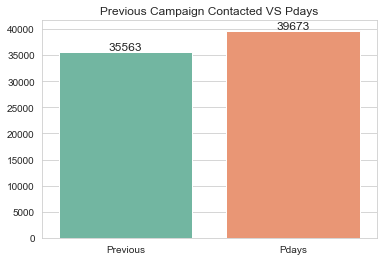

Selisih Antara Previous dan Pdays:  4110
Selisih Antara Previous dan Pdays dimana Previous==0:  0


In [358]:
ax = sns.barplot(y=count_both, x= ["Previous", "Pdays"], palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Previous Campaign Contacted VS Pdays')
plt.show()

print('Selisih Antara Previous dan Pdays: ', len(list(set(pdays_index)-set(previous_index))))
pdays0_index = df.query('pdays==999 & previous==0').index
print('Selisih Antara Previous dan Pdays dimana Previous==0: ', len(list(set(pdays0_index)-set(previous_index))))

- Terdapat sebuah kejanggalan dimana berdasarkan nilai pada kolom `previous`, jumlah nasabah yang dihubungi sebanyak 35563 nasabah. Sedangkan jika dibandingkan dengan jumlah nasabah yang terakhir dikontak dari kampanye sebelumnya(`pdays`) terdapat hingga 39673 nasabah.
- Selisih yang dihasilkan cukup tinggi yang dimana dari pengecekan sebelumnya sebanyak 35563 nasabah yang terdapat pada `pdays` memang benar-benar tidak dihubungi sama sekali pada kampanye sebelumnya.
- Selisihnya atau sebanyak 4110 nasabah ada kemungkinan pernah dihubungi, dimana mereka ternyata memiliki status `failure` atau tidak berhasil pada kampanye yang sebelumnya
- Oleh karena itu khusus pada nasabah ini (4110) akan kita isi nilainya dengan nilai mean/median pada tahap data prepocessing bagian `handling missing value`
- Sisa nasabah yang terbukti benar-benar tidak dihubungi/mengikuti program sebelumnya, akan dikelompokkan jadi satu. Hal ini berarti kita akan sekaligus melakukan `feature creation` untuk menentukan kelompok nasabah berdasarkan rentang waktu terakhir dihubungi(berdasarkan kolom `pdays`)

In [662]:
count_camp = df.query('campaign>4 & y=="yes"').value_counts('y').tolist()
count_camp4= df.query('campaign<=4 & y=="yes"').value_counts('y').tolist()
count_both = count_camp+count_camp4



[306]

### 4.6. Kecenderungan Pada Intensitas Jumlah Kontak Yang Dilakukan

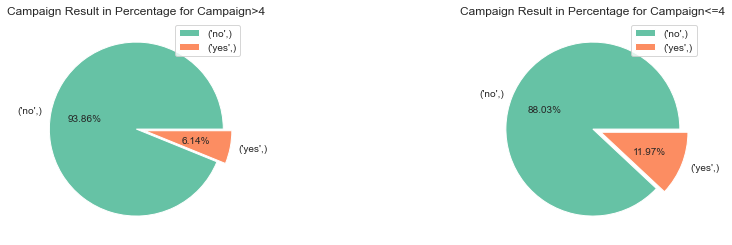

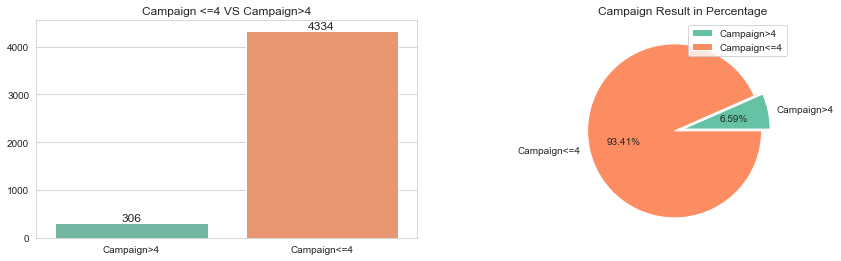

In [667]:
campaign_more = df.query('campaign>4').value_counts('y')/df.query('campaign>4').value_counts('y').sum()*100
campaign_less = df.query('campaign<=4').value_counts('y')/df.query('campaign<=4').value_counts('y').sum()*100
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.pie(campaign_more, labels= campaign_more.index, colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('Campaign Result in Percentage for Campaign>4')
plt.legend()

plt.subplot(1,2,2)
plt.pie(campaign_less, labels= campaign_less.index, colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('Campaign Result in Percentage for Campaign<=4')
plt.legend()

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
ax = sns.barplot(y=count_both, x= ["Campaign>4", "Campaign<=4"], palette=colors)
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Campaign <=4 VS Campaign>4')

plt.subplot(1,2,2)
plt.pie(count_both, labels= ["Campaign>4", "Campaign<=4"], colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('Campaign Result in Percentage')
plt.legend()
plt.show()


- Balik lagi ke kampanye sekarang atau program deposito berjangka ini, didapatkan bahwa nasabah yang dihubungi <=4 kali justru memiliki rasio yang tinggi sebanyak 11.97%. Mereka juga berkontribusi jauh sekali dibandingkan >4 hingga 4334 nasabah atau mewakili sebesar 93.41% dari total nasabah yang mengikuti program deposito berjangka
- Mereka yang dihubungi lebih dari 4x hanya mewakili sebagian kecil atau sebesar 6.59% dari keseluruhan nasabah yang mengikuti program ini. Dan rasio yang mengikuti dibandingkan yang tidak sangatlah kecil hanya 6.14%

### 4.7. Kecenderungan Pada Intensitas Durasi Kontak

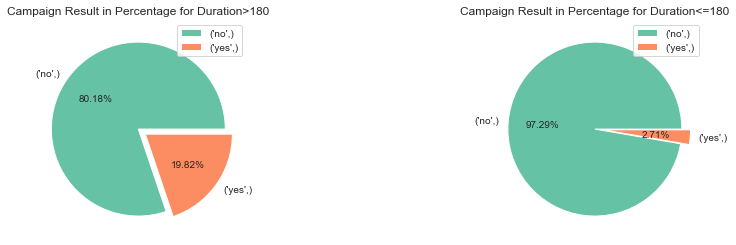

In [360]:
campdur_more = df.query('duration>=180').value_counts('y')
campdur_less = df.query('duration<180').value_counts('y')
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.pie(campdur_more, labels= campdur_more.index, colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('Campaign Result in Percentage for Duration>180')
plt.legend()

plt.subplot(1,2,2)
plt.pie(campdur_less, labels= campdur_less.index, colors = colors, explode= (0, 0.1), autopct='%.2f%%')
plt.title('Campaign Result in Percentage for Duration<=180')
plt.legend()

- Durasi atau lamanya waktu yang dihabiskan dalam kontak terakhir, ternyata sangat mempengaruhi keputusan pelanggan untuk mengikuti program ini.
- Hal ini terbukti dimana durasi telpon yang melebihi 180 detik atau lebih dari 3 menit, 19.82% dari mereka akhirnya mengikuti program
- Sedangkan durasi telpon kkurang dari 180 detik, hanya sekitar 2.7% saja yang pada akhirnya mengikuti program. Ini wajar terjadi karena durasi telpon yang singkat menandakan bahwa pihak nasabah yang menerima telpon tidak tertarik dengan kampanye/program yang sedang dilaksanakan oleh pihak bank ABC

### 4.7. Column Analysis

In [361]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [362]:
df_cor=df.corr()
for i in df_cor:
    j=0
    df_cor[i] = np.where(df_cor[i].abs()>0.1, df_cor[i], 'low')

for i in df_cor:
    print(f'Column: {i}')
    low_corr = df_cor[i][(df_cor[i] == "low")].value_counts().tolist()
    if low_corr:
        print('low:',low_corr)
    else:
        print('low:',0)
    print("="*20)


Column: age
low: [8]
Column: duration
low: [9]
Column: campaign
low: [5]
Column: pdays
low: [5]
Column: previous
low: [4]
Column: emp.var.rate
low: [2]
Column: cons.price.idx
low: [4]
Column: cons.conf.idx
low: [5]
Column: euribor3m
low: [2]
Column: nr.employed
low: [2]


- Nilai korelasi pada kolom-kolom numerik bervariasi namun cenderung banyak yang rendah. Dimana kolom `duration` bahkan memiliki korelasi rendah dengan semua kolom numerik

In [363]:
skewness = pd.DataFrame({'columns':df.describe().columns, 'skew' : df.skew(axis=0)})
skewness.reset_index(drop=True, inplace=True)
skewness['status'] = np.where(skewness['skew'].abs()>0.5, 'Skewed', 'Normal')
skewness

,columns,skew,status
0,age,0.784697,Skewed
1,duration,3.263141,Skewed
2,campaign,4.762507,Skewed
3,pdays,-4.922190,Skewed
4,previous,3.832042,Skewed
5,emp.var.rate,-0.724096,Skewed
6,cons.price.idx,-0.230888,Normal
7,cons.conf.idx,0.303180,Normal
8,euribor3m,-0.709188,Skewed
9,nr.employed,-1.044262,Skewed


- Hanya terdapat dua kolom numerik saja yang memiliki pendistribusian data `normal`. Selebihnya kolom-kolom ini bersifat `skewed`

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- Jika hanya melihat dari jumlah baris pada kolom, tidak terdapat `missing value` yang terdeteksi. Namun jika melihat statistik deskriptif tiap-tiap kolom, ternyata ditemukan bahwa kolom `pdays` memiliki nilai yaitu `999` yang menandakan bahwa nasabah belum pernah dihubungi sama sekali
- Nilai ini akan kita anggap sebagai `missing value` dan nantinya nilai ini akan diubah menjadi `nan/null`

In [365]:
for i in cat_columns:
    print(f'Cat Columns: {i}')
    print(f'{df[i].nunique()}')
    print('='*20)

Cat Columns: job
12
Cat Columns: marital
4
Cat Columns: education
8
Cat Columns: default
3
Cat Columns: housing
3
Cat Columns: loan
3
Cat Columns: contact
2
Cat Columns: month
10
Cat Columns: day_of_week
5
Cat Columns: poutcome
3
Cat Columns: y
2


- Dari jumlah nilai unik pada tiap-tiap kolom, tampaknya tidak ada kolom yang memiliki tingkat `kardinalitas` yang tinggi
- Oleh karean itu nantinya tidak ada penanganan kardinalitas pada kolom-kolom ini 

## **5. Data Preprocessing**
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### 5.1 Cleaning Dataset

- Berdasarkan informasi attribut kolom disebutkan bahwa nilai 999 pada pdays menandakan bahwa nasabah pada dasarnya tidak dihubungi pada kampanye yang sebelumnya telah dilaksanakan. Maka kita akan mengubah nilai-nilai ini dengan `null/nan`

In [366]:
df['pdays'].replace(to_replace={999: np.nan}, inplace=True)

In [367]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,1515.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,6.014521,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,3.824906,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,3.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,6.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,7.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- Setelah cleaning didapatkan bahwa nilai median untuk `pdays` sebesar 6.0 sedangkan Q3 sebesar 7.0.

In [368]:
print("Jumlah data pada kolom pdays setelah cleaning: ",np.round(100-(df['pdays'].isnull().sum()/df.shape[0]*100), 2),"%")

Jumlah data pada kolom pdays setelah cleaning:  3.68 %


### 5.1 Set Data Inference

- Kita akan mengambil sampel secara acak dari dataset utama, yang nantinya akan dijadikan sebagai dataset `inference` atau dataset asing. Hal ini berguna agar pada tahap pengujian `inference` kita dapat mengetahui apakah model juga sudah cukup baik menentukan apakah nasabah akan berlangganan `deposito berjangka` dengan nilai parameter/variabel yang belum pernah `dikenal` sebelumnya.

In [369]:
df_inf = df.sample(100, random_state=40)

In [370]:
df = df.drop(df_inf.index)

In [371]:
# reset index

df.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

### 5.3 Split Dataset

In [372]:
X = df.drop('y', axis=1)
y = df['y']

#### 5.3.1 Split into Data Train and Dataset

In [373]:
# Splitting Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40, stratify= y)

#### 5.3.2 Checking Data and Column Distributions

In [374]:
preprocess_handling = pd.DataFrame({'columns':X_train.describe().columns, 'skew' : df.skew(axis=0)})
preprocess_handling.reset_index(drop=True, inplace=True)

preprocess_handling['status'] = np.where(preprocess_handling['skew'].abs()>0.5, 'Skewed', 'Normal')

In [375]:
preprocess_handling

,columns,skew,status
0,age,0.785045,Skewed
1,duration,3.264358,Skewed
2,campaign,4.761868,Skewed
3,pdays,1.458191,Skewed
4,previous,3.831856,Skewed
5,emp.var.rate,-0.723685,Skewed
6,cons.price.idx,-0.230271,Normal
7,cons.conf.idx,0.303204,Normal
8,euribor3m,-0.709045,Skewed
9,nr.employed,-1.044073,Skewed


- Pendistribusian data tiap kolom fitur akan digunakan sebagai acuan saat memperlakukan kolom dalam tahap `handling outlier` dan `handling missing value`

In [376]:
X_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32870.000000,32870.000000,32870.000000,1208.000000,32870.000000,32870.000000,32870.000000,32870.000000,32870.000000,32870.000000
mean,40.031609,258.493094,2.577122,5.997517,0.173715,0.079559,93.576052,-40.504165,3.617961,5166.879462
std,10.398521,259.857200,2.790646,3.848949,0.495318,1.571836,0.580234,4.636269,1.735841,72.346580
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,3.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,6.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,7.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Angka pada `Q3` kebetulan sama dengan akumulasi satu minggu(7hari), Oleh karena itu angka ini akan kita gunakan pada tahap `Feature Creation` yang dimana kolom baru akan mengacu pada kolom `pdays`

In [377]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('='*50)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


### 5.4 Handling Outliers

- Buatlah fungsi untuk menangani baik kolom yang terdistribusi `normal` dan juga kolom yang terdistribusi `skewed`

In [378]:
# Function to find upper and lower boundaries for normally distributed variables
# Calculate the boundaries outside which sit the outliers for a Gaussian distribution

def find_normal_boundaries(df, variable):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()

    return upper_boundary, lower_boundary
    
# Since it's skewed, we are using IQR to handle outliers

def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower = df[variable].quantile(0.25) - distance * IQR
    upper = df[variable].quantile(0.75) + distance * IQR

    return upper, lower

- Buat fungsi untuk menampilkan visual pendistrbusian data tiap-tiap kolom fitur baik sebelum ditangani maupun setelah ditangani `outlier`-nya 

In [603]:

# Function to create histogram and boxplot for each features

def diagnostic_plots(df, df_trim, variable):
    #Define figure size
    plt.figure(figsize=(16,4))

    #Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df_trim[variable], bins=30, kde=True, color='#006699')
    plt.title(f'Histogram of {variable}')

    #Boxplot Before
    plt.subplot(1,3, 2)
    sns.boxplot(y=df[variable])
    plt.title(f'Before Handling in {variable}')

    #Boxplot After
    plt.subplot(1,3, 3)
    sns.boxplot(y=df_trim[variable])
    plt.title(f'After Handling in {variable}')

    plt.show()

#### 5.4.1 Detect Outliers
- Sebelum melakukan penanganan pada `outliers`, alangkah baiknya kita check terlebih dahulu apakah kolom tersebut memiliki `outlier` dan seberapa banyak `outlier` tersebut dibandingkan dengan total keseluruhan data yang terdapat pada data `Training`.

In [380]:
j = 0
outliers={}
for i in X_train.describe().columns:
    if preprocess_handling['status'].loc[(preprocess_handling['columns']==i)].values[0]== 'Normal':
        upper_boundary, lower_boundary = find_normal_boundaries(X_train, i)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    else:
        upper_boundary, lower_boundary = find_skewed_boundaries(X_train, i, 1.5)
        print(f"Batas lower dan upper untuk {i}:{lower_boundary, upper_boundary}")
        outliers[f"outliers{j}"] = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    print("="*30)
    j+=1

Batas lower dan upper untuk age:(9.5, 69.5)
Batas lower dan upper untuk duration:(-223.5, 644.5)
Batas lower dan upper untuk campaign:(-2.0, 6.0)
Batas lower dan upper untuk pdays:(-3.0, 13.0)
Batas lower dan upper untuk previous:(0.0, 0.0)
Batas lower dan upper untuk emp.var.rate:(-6.6000000000000005, 6.200000000000001)
Batas lower dan upper untuk cons.price.idx:(91.83535048022983, 95.31675374855885)
Batas lower dan upper untuk cons.conf.idx:(-54.412972931593366, -26.59535685239684)
Batas lower dan upper untuk euribor3m:(-4.081499999999999, 10.3865)
Batas lower dan upper untuk nr.employed:(4905.6, 5421.6)


- Setelah pendeteksian nilai ambang batas, saya menetapkan perlakukan terhadap kolom:
    - `Trimming`: Jika outlier dibawah 5%
    - `Capping`: Jika outlier berada direntang 5-15%
    - `Keep`: Jika outlier berada di atas 15%

In [381]:
for i, (k, v) in enumerate(outliers.items()):
    X_train_trimmed_sim = X_train.loc[~outliers[k]]
    preprocess_handling.loc[i,'trimmed_row'] = X_train.shape[0] - X_train_trimmed_sim.shape[0]
    preprocess_handling.loc[i,'percentage'] = np.round(100-(X_train_trimmed_sim.shape[0]/X_train.shape[0]*100), 2)
    preprocess_handling.loc[i,'action'] = np.where(preprocess_handling.loc[i,'percentage']>15, 'Keep', 
                                        np.where(preprocess_handling.loc[i,'percentage']>5, 'Capping', 'Trim'))

# Keep Outlier for Previous
    preprocess_handling.loc[4,'action'] = "Keep"


In [382]:
preprocess_handling

,columns,skew,status,trimmed_row,percentage,action
0,age,0.785045,Skewed,362.0,1.10,Trim
1,duration,3.264358,Skewed,2394.0,7.28,Capping
2,campaign,4.761868,Skewed,1948.0,5.93,Capping
3,pdays,1.458191,Skewed,67.0,0.20,Trim
4,previous,3.831856,Skewed,4527.0,13.77,Keep
5,emp.var.rate,-0.723685,Skewed,0.0,0.00,Trim
6,cons.price.idx,-0.230271,Normal,0.0,0.00,Trim
7,cons.conf.idx,0.303204,Normal,0.0,0.00,Trim
8,euribor3m,-0.709045,Skewed,0.0,0.00,Trim
9,nr.employed,-1.044073,Skewed,0.0,0.00,Trim


- Dari rangkuman hasil pendeteksian `outlier`, kita mendapatkan informasi bahwa:
    - Kolom `previous` merupakan kolom yang memiliki persentase outlier yang tinggi sebesar 13.77%
    - Namun ada pengecualian dalam menangani `outlier` untuk kolom `previous`. Ini dikarenakan pada kolom ini outlier yang dideteksi ialah yang melebihi atau kurang dari **0**.
    - Padahal pada kolom ini menjelaskan bahwa seberapa banyak nasabah dihubungi pada kampanye sebelumnya
    - Jika kita mengubahnya dengan 0, berarti seluruh nasabah tidak pernah dihubungi sama sekali, sedangkan terdapat kolom lain yang menjelaskan bahwa nasabah pernah dihubungi, yang terdapat pada kolom `pdays`(hari terakhir dihubungi) dan `poutcome`(hasil yang didapatkan)
    - Oleh karena itu meskipun `outlier` yang dideteksi melebihi 5% dan dibawah 15% sehingga harus melewati tahap `capping`, akan kita kecualikan dan hanya diperlakukan dengan dibiarkan saja(`keep`)
    - Sedangkan pada kolom `Duration` dan `Campaign` akan kita lakukan proses `capping`
    - Sisa kolom yang memiliki `outlier` akan dihapus karena hanya memiliki `outlier` kurang dari 5%.

#### 5.4.2 Handling Outliers

##### A. Trimming Outliers

In [383]:
outliers_tot = outliers['outliers0']
for i, (k, v) in enumerate(outliers.items()):
    if i not in [1, 2, 4]:
        outliers_tot += outliers[k]

In [384]:
X_train_trimmed = X_train.loc[~outliers_tot]
y_train_trimmed = y_train.loc[~outliers_tot]

print(f"Jumlah baris pada X_train SEBELUM di Trimming: {X_train.shape[0]}")
print(f"Jumlah baris pada X_train SETELAH di Trimming: {X_train_trimmed.shape[0]}")
print(f"% Outlier dari Keseluruhan Data: {100-(X_train_trimmed.shape[0]/X_train.shape[0]*100):.2f}%")

Jumlah baris pada X_train SEBELUM di Trimming: 32870
Jumlah baris pada X_train SETELAH di Trimming: 32442
% Outlier dari Keseluruhan Data: 1.30%


- Sebanyak 1.3% Dari data `Train` telah dihapus dari tahap penanganan `outlier`

In [385]:
# Reset Index

X_train_trimmed.reset_index(drop=True, inplace=True)
y_train_trimmed.reset_index(drop=True, inplace=True)

##### B. Capping Outliers

In [386]:
from feature_engine.outliers import Winsorizer

# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['duration', 'campaign'],
                          missing_values='ignore')

windsoriser.fit(X_train_trimmed)

X_train_capped = windsoriser.transform(X_train_trimmed)

##### C. Keeping Outliers

In [387]:
X_train_capped['previous'].describe()

count    32442.000000
mean         0.165218
std          0.478264
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

##### D. Handling Outliers Result

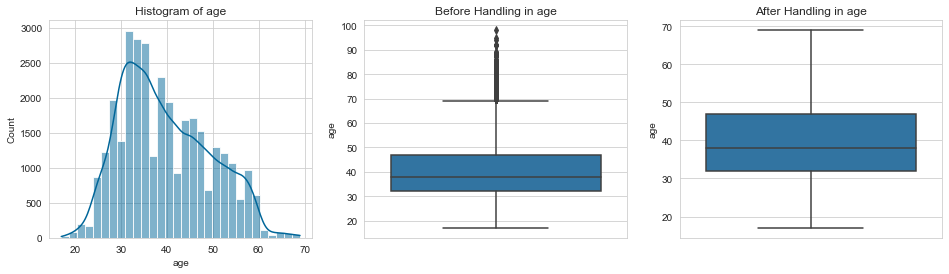

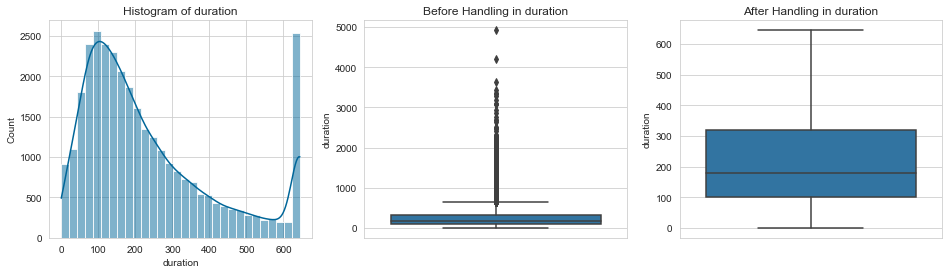

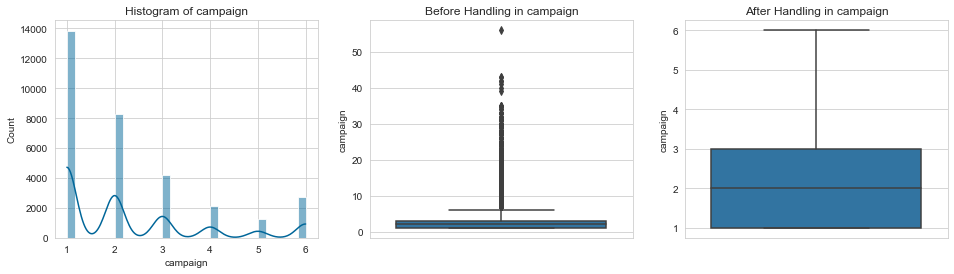

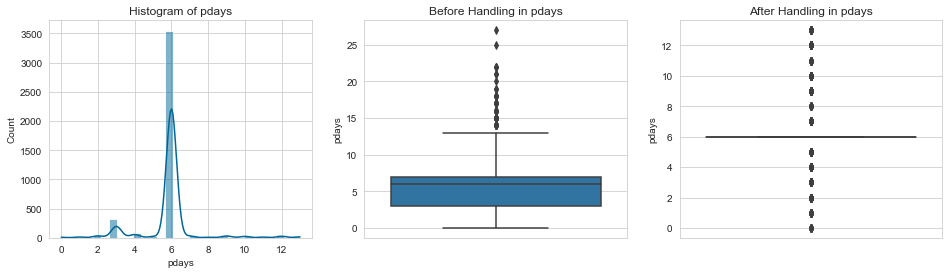

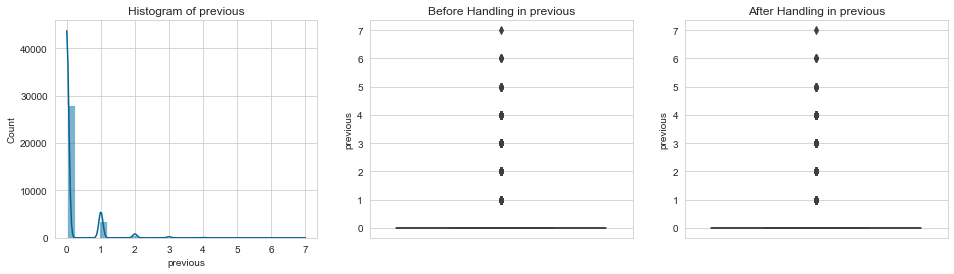

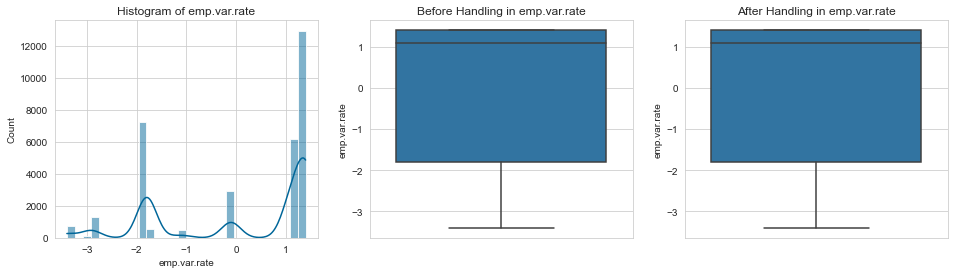

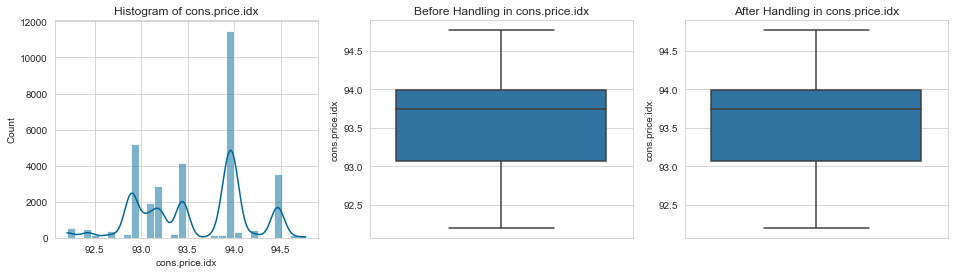

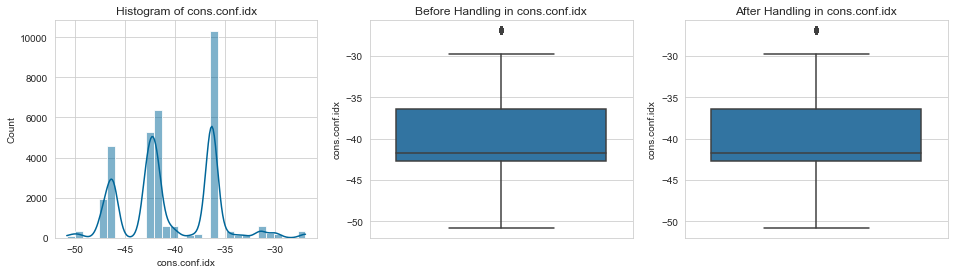

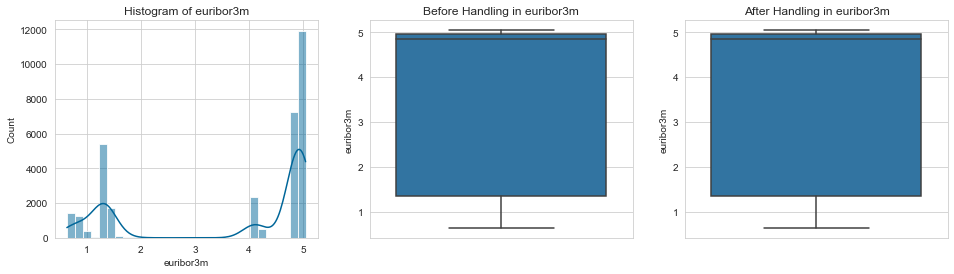

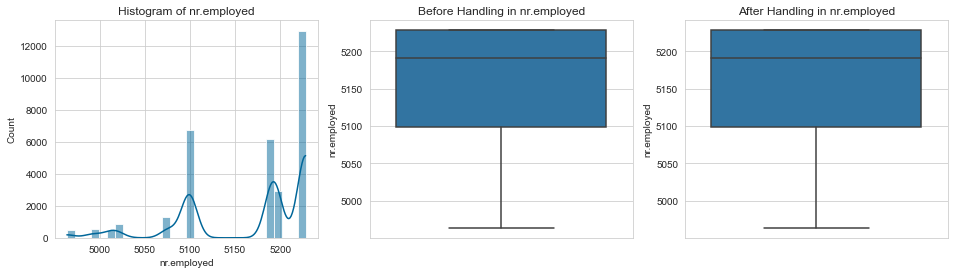

In [604]:
for i in X_train_capped.describe().columns:
    diagnostic_plots(X_train, X_train_capped, i)

- Visual diatas merupakan hasil penanganan `outlier` sebelum dan sesudahnya.
- Terlihat pada kolom `pdays` outlier masih ada namun sudah berkurang lebih banyak jika dibandingkan dengan sebelumnya
- pada `cons.conf.idx` tidak dilakukan penanganan, karena masih belum dianggap `outlier` dengan melakukan perhitungan `z score`

In [389]:
X_train_capped.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32442.000000,32442.000000,32442.000000,1069.000000,32442.000000,32442.000000,32442.000000,32442.000000,32442.000000,32442.000000
mean,39.625979,234.579711,2.285371,5.388213,0.165218,0.110511,93.580636,-40.551683,3.653854,5168.747926
std,9.675598,177.666885,1.558019,2.925718,0.478264,1.555931,0.575077,4.575481,1.718451,70.781150
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,3.000000,0.000000,-1.800000,93.075000,-42.700000,1.354000,5099.100000
50%,38.000000,179.000000,2.000000,6.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,6.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,69.000000,644.500000,6.000000,13.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### 5.5 Handling Missing Value & Feature Creation

- Check terlebih dahulu seberapa banyak `missing value` yang terdapat pada tiap-tiap kolom baik untuk data `Train` maupun data `Test`

In [390]:
X_train_capped['pdays'].isnull().sum()/X_train_capped.shape[0]*100


96.70488872449295

In [391]:
X_test['pdays'].isnull().sum()/X_test.shape[0]*100

96.28863470430761

- Terdapat hingga lebih dari 96% dari kolom `pday` yang bernilai kosong baik untuk Train set maupun Test set
- Sebelumnya saat melakukan EDA, kita menemukan suatu fakta bahwa ternyata meskipun kolom `pdays` memiliki hubungan dengan kolom `previous`, nyatanya terdapat selisih jumlah baris yang dimiliki oleh masing-masing kolom tersebut. Selisih ini menandakan bahwa ada kemungkinan bahwa nasabah telah dihubungi, namun saat pengisian kolom `pdays` terdapat `human error` yang mengakibatkan perbedaan informasi yang diberikan.
- Nasabah yang memiliki nilai != 0 pada kolom `previous` akan diisi dengan nilai median pada kolom `pdays`
- Sedangkan untuk yang ==0, akan tetap dibiarkan dengan `nan/null`
- Dengan latar belakang ini, kita akan membuat sebuah `kolom baru` bernama `pdays_cat` yang akan mengelompokkan nasabah mana yang benar-benar belum dihubungi dan yang sudah dihubungi. Dimana untuk yang sudah dihubungi kita pecah lagi menjadi dua kelompok yaitu kurang dari atau sama dengan seminggu(7 hari) sesuai dengan nilai Q3 pada kolom `pdays` dan lebih dari seminggu.
- Sehingga total kategori yang terdapat pada kolom `pdays_cat` berjumlah tiga yaitu: `not contacted`, `<=7 days`, dan `>7 days`
- Setelah kolom `pdays_cat` telah terisi semua, nantinya kolom `pdays` akan kita hapus pada tahap `feature selection` karena telah direpresentasikan nilainya pada kolom `pdays_cat`

In [392]:
poutcome_index = X_train_capped.query('poutcome=="nonexistent"').index
previous_index = X_train_capped.query('previous==0').index
pdays_index = X_train_capped.query('pdays!=pdays').index
pdays0_index = X_train_capped.query('pdays!=pdays & previous==0').index

poutcome_test_index = X_test.query('poutcome=="nonexistent"').index
previous_test_index = X_test.query('previous==0').index
pdays_test_index = X_test.query('pdays!=pdays').index
pdays0_test_index = X_test.query('pdays!=pdays & previous==0').index


In [393]:
list(set(poutcome_index)-set(previous_index))

[]

In [394]:
pdays_diff = list(set(pdays_index)-set(pdays0_index))
pdays_test_diff = list(set(pdays_test_index)-set(pdays0_test_index))

In [572]:
print(f"Selisih pdays terhadap pdays yang memiliki previous==0(Train):{pdays_diff.__len__()}")
print(f"Selisih pdays terhadap pdays yang memiliki previous==0(Test):{pdays_test_diff.__len__()}")



Selisih pdays terhadap pdays yang memiliki previous==0(Train):3242
Selisih pdays terhadap pdays yang memiliki previous==0(Test):783


- Baris index yang tidak termasuk dalam previous==0 dalam arti lain yang sebenarnya pernah dihubungi ataupun akibat `human error` dalam kesalahan input, akan kita isi dengan nilai `median` X train

In [396]:
X_train_pdays_median = X_train_capped.median()
X_train_capped['pdays'].loc[pdays_diff] = X_train_pdays_median
X_test['pdays'].loc[pdays_test_diff] = X_train_pdays_median

In [397]:
X_train_capped['pdays_cat'] = "Not Contacted"
X_test['pdays_cat'] = "Not Contacted"

In [398]:
X_train_capped['pdays_cat'][(X_train_capped['pdays']<=7)] = '<=7 days'
X_test['pdays_cat'][(X_test['pdays']<=7)] = '<=7 days'

In [399]:
X_train_capped['pdays_cat'][(X_train_capped['pdays']>7)] = '>7 days'
X_test['pdays_cat'][(X_test['pdays']>7)] = '>7 days'

In [400]:
X_train_capped['pdays_cat'].unique()

array(['Not Contacted', '<=7 days', '>7 days'], dtype=object)

- Hasil pembuatan kategori pada kolom fitur `pdays_cat` adalah:
    - `Not Contacted`: Jika nasabah belum dihubungi sama sekali dalam kampanye sebelumnya
    - `<=7 days`: Nasabah pernah dihubungi minimal sekali dalam kurun waktu kurang dari 7 hari
    - `>7 days`: Nasabah pernah dihubungi minimal sekali dan telah melewati lebih dari 7 hari

In [575]:
X_train_capped.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays             28131
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
pdays_cat             0
dtype: int64

- Pada akhir tahap ini sudah tidak ditemukannya lagi `missing value` pada kolom yang dibutuhkan.
- Kecuali pada kolom `pdays`, masih terdapat missing value yang sebelumnya digunakan sebagai `identifier` untuk mengisi nilai pada `pdays_cat`. Namun ini akan kita biarkan, karena kolom ini akan dihapus pada `feature selection`.

### 5.6 Feature Selection

In [403]:
X_train_selected = X_train_capped.copy()
num_columns.remove('pdays')
cat_columns.append('pdays_cat')
dropped_columns = ['pdays']
X_train_selected.drop(dropped_columns, axis=1, inplace=True)
X_test.drop(dropped_columns, axis=1, inplace=True)

- Karena kolom `pdays` sudah diganti oleh `pdays_cat`, maka kita akan menghapus kolom ini

### 5.7 Feature Scaling & Encoding

#### 5.7.1 Splitting Columns (Numerical and Categorical)

In [405]:
# Split on X_train

X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

# Split on X_test

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

#### 5.7.2 Feature Scaling

In [406]:
# Feature Scaling Using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

#### 5.7.3 Feature Encoding

In [407]:
# Feature Encoding

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)


#### 5.7.4 Concatenate Numerical & Categorical

In [408]:
# Concate Data

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded.toarray()], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded.toarray()], axis=1)

## **6. Model Definition**
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [409]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [410]:
from sklearn.svm import SVC

clf_svc = SVC()

In [411]:
from sklearn.tree import DecisionTreeClassifier

clf_dt= DecisionTreeClassifier(random_state=4)


In [412]:
from sklearn.ensemble import RandomForestClassifier

clf_rnd= RandomForestClassifier(random_state=4)

In [413]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5)

In [414]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()

In [415]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), n_estimators=500, 
    max_samples=100, bootstrap=True, random_state=4)

## **7. Model Training**
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [416]:
y_train_trimmed.replace(to_replace=dict(yes=1, no=0), inplace=True)
y_test.replace(to_replace=dict(yes=1, no=0), inplace=True)

In [417]:
model.fit(X_train_final, y_train_trimmed)

/Users/krisbiantoroprabowo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [418]:
clf_svc.fit(X_train_final, y_train_trimmed)

SVC()

In [419]:
clf_dt.fit(X_train_final, y_train_trimmed)

DecisionTreeClassifier(random_state=4)

In [420]:
clf_rnd.fit(X_train_final, y_train_trimmed)

RandomForestClassifier(random_state=4)

In [421]:
clf_knn.fit(X_train_final, y_train_trimmed)

KNeighborsClassifier()

In [422]:
clf_nb.fit(X_train_final, y_train_trimmed)

GaussianNB()

In [423]:
bag_clf.fit(X_train_final, y_train_trimmed)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, random_state=4)

## **8. Model Evaluation**
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [587]:
evaluation_metrics = pd.DataFrame(columns=['Model', 'f1-score(No, Train)', 'f1-score(Yes, Train)', 'f1-score(No, Test)', 'f1-score(Yes, Test)'])

### 8.1 Base Model

#### 8.1.1. Logistic Regression

In [577]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

y_pred_train_log = model.predict(X_train_final)
y_pred_test_log = model.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_log))
print(classification_report(y_test, y_pred_test_log))
# figure size


              precision    recall  f1-score   support

           0       0.93      0.98      0.95     28951
           1       0.66      0.38      0.48      3491

    accuracy                           0.91     32442
   macro avg       0.79      0.68      0.72     32442
weighted avg       0.90      0.91      0.90     32442

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7293
           1       0.62      0.56      0.59       925

    accuracy                           0.91      8218
   macro avg       0.78      0.76      0.77      8218
weighted avg       0.91      0.91      0.91      8218



In [588]:
evaluation_metrics.loc[0] = ['Logistic Regression', 0.95, 0.48, 0.95, 0.59]

#### 8.1.2 SVC

In [426]:

y_pred_train_svm = clf_svc.predict(X_train_final)
y_pred_test_svm = clf_svc.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_svm))

print(classification_report(y_test, y_pred_test_svm))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96     28951
           1       0.79      0.37      0.50      3491

    accuracy                           0.92     32442
   macro avg       0.86      0.68      0.73     32442
weighted avg       0.91      0.92      0.91     32442

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7293
           1       0.69      0.37      0.49       925

    accuracy                           0.91      8218
   macro avg       0.81      0.68      0.72      8218
weighted avg       0.90      0.91      0.90      8218



In [589]:
evaluation_metrics.loc[1] = ['SVM', 0.96, 0.50, 0.95, 0.49]

#### 8.1.3 Decision Tree

In [427]:

y_pred_train_dt = clf_dt.predict(X_train_final)
y_pred_test_dt = clf_dt.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_dt))

print(classification_report(y_test, y_pred_test_dt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28951
           1       1.00      1.00      1.00      3491

    accuracy                           1.00     32442
   macro avg       1.00      1.00      1.00     32442
weighted avg       1.00      1.00      1.00     32442

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7293
           1       0.51      0.49      0.50       925

    accuracy                           0.89      8218
   macro avg       0.72      0.71      0.72      8218
weighted avg       0.89      0.89      0.89      8218



In [590]:
evaluation_metrics.loc[2] = ['Decision Tree', 1.0, 1.0, 0.94, 0.50]

#### 8.1.4 Random Forest Classifier

In [428]:

y_pred_train_rnd = clf_rnd.predict(X_train_final)
y_pred_test_rnd = clf_rnd.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_rnd))

print(classification_report(y_test, y_pred_test_rnd))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28951
           1       1.00      1.00      1.00      3491

    accuracy                           1.00     32442
   macro avg       1.00      1.00      1.00     32442
weighted avg       1.00      1.00      1.00     32442

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7293
           1       0.67      0.44      0.53       925

    accuracy                           0.91      8218
   macro avg       0.80      0.71      0.74      8218
weighted avg       0.90      0.91      0.90      8218



In [591]:
evaluation_metrics.loc[3] = ['Random Forest', 1.0, 1.0, 0.95, 0.53]

#### 8.1.5 K-Nearest Neighbor

In [429]:

y_pred_train_knn = clf_knn.predict(X_train_final)
y_pred_test_knn = clf_knn.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_knn))

print(classification_report(y_test, y_pred_test_knn))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96     28951
           1       0.74      0.53      0.62      3491

    accuracy                           0.93     32442
   macro avg       0.84      0.75      0.79     32442
weighted avg       0.92      0.93      0.92     32442

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7293
           1       0.59      0.43      0.50       925

    accuracy                           0.90      8218
   macro avg       0.76      0.70      0.72      8218
weighted avg       0.89      0.90      0.90      8218



In [592]:
evaluation_metrics.loc[4] = ['K Nearest Neighbor', 0.96, 0.62, 0.95, 0.50]

#### 8.1.6 Naive Bayes

In [430]:

y_pred_train_nb = clf_nb.predict(X_train_final)
y_pred_test_nb = clf_nb.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_nb))

print(classification_report(y_test, y_pred_test_nb))


              precision    recall  f1-score   support

           0       0.95      0.83      0.88     28951
           1       0.30      0.61      0.40      3491

    accuracy                           0.80     32442
   macro avg       0.62      0.72      0.64     32442
weighted avg       0.88      0.80      0.83     32442

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7293
           1       0.33      0.67      0.44       925

    accuracy                           0.81      8218
   macro avg       0.64      0.75      0.66      8218
weighted avg       0.88      0.81      0.83      8218



In [594]:
evaluation_metrics.loc[5] = ['Naive Bayes', 0.88, 0.40, 0.88, 0.44]

#### 8.1.7 Bagging Ensembles

In [431]:

y_pred_train_bag = bag_clf.predict(X_train_final)
y_pred_test_bag = bag_clf.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_bag))

print(classification_report(y_test, y_pred_test_bag))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     28951
           1       0.69      0.30      0.42      3491

    accuracy                           0.91     32442
   macro avg       0.81      0.64      0.69     32442
weighted avg       0.90      0.91      0.89     32442

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7293
           1       0.69      0.32      0.44       925

    accuracy                           0.91      8218
   macro avg       0.80      0.65      0.69      8218
weighted avg       0.89      0.91      0.89      8218



In [595]:
evaluation_metrics.loc[6] = ['Bagging Ensembles', 0.95, 0.42, 0.95, 0.44]

### 8.2 Hyperparameter Tuning With GridSearch & Cross Validation

- Pada tahap ini kita akan melakukan pencarian `hyperparameter` terbaik menggunakan fungsi `GridSearchCV` yang dimana fungsi ini sekaligus melakukan `Cross Validation`
- `Cross Validaiton` yang akan dilakukan pada tiap-tiap evaluasi model sebanyak 5 kali, atau seperti yang berlaku pada umumnya

In [432]:
from sklearn.model_selection import GridSearchCV

In [480]:
# Parameter list

parameters_logreg = { 'C': [100, 200],
                    'penalty': ['l1', 'l2'],
                    'class_weight': ['balanced', None],
                    'solver': ['liblinear', 'newton-cg', 'lbfgs']
                    }

parameters_svc = {'kernel': ['rbf', 'linear'], 
                'C': [ 10, 100], 
                'gamma': [0.1, 0.01]
                }

parameters_dt = {'criterion':['gini','entropy'],
              'max_depth':np.arange(2,12, 2),
              'min_samples_split':np.arange(2,12, 2),
              'min_samples_leaf':np.arange(2,12, 2)
              }

parameters_rnd = {'criterion':['gini','entropy'],
              'max_depth':np.arange(2,12, 2),
              'min_samples_split':np.arange(2,12, 2),
              'min_samples_leaf':np.arange(2,12, 2)
              }

parameters_knn = {'n_neighbors':np.arange(3, 8, 2),
              'weights':['uniform', 'distance']
              }

parameters_nb = {'var_smoothing':[1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}

parameters_bag = {'n_estimators':np.arange(10, 100, 10)}



- Kita akan menambahkan nilai `recall` untuk kelas yes/positive didalam metriks untuk hasil evaluasi permodelan `hyperparameter tuning` ini.

In [610]:
tuned_evaluation_metrics = pd.DataFrame(columns=['Model', 'f1-score(No, Train)', 'f1-score(Yes, Train)', 'f1-score(No, Test)', 'f1-score(Yes, Test)', 'recall(Yes, Train)', 'recall(Yes, Test)'])

#### 8.2.1 Logistic Regression

In [434]:
logreg_grid = GridSearchCV(model, param_grid = parameters_logreg, cv=5, scoring='f1', return_train_score=True, n_jobs=-1)
logreg_grid.fit(X_train_final, y_train_trimmed)

/Users/krisbiantoroprabowo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.57078608        nan        nan 0.5708356  0.5708356  0.57090665
 0.4770416         nan        nan 0.4773226  0.4773226  0.47750193
 0.5707339         nan        nan 0.57078608 0.57078608 0.57090938
 0.4773226         nan        nan 0.4770416  0.4773226  0.47695319]
  warnings.warn(
/Users/krisbiantoroprabowo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the train scores are non-finite: [0.57353633        nan        nan 0.57353633 0.57353633 0.57356848
 0.48226954        nan        nan 0.4822985  0.4822985  0.48211358
 0.57356219        nan        nan 0.57354933 0.57353633 0.57355433
 0.4822508         nan        nan 0.48223037 0.4822985  0.48186342]
  warnings.warn(
/Users/krisbiantoroprabowo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 200], 'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']},
             return_train_score=True, scoring='f1')

In [435]:
logreg_grid.best_params_

{'C': 200, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [436]:
logreg_grid.best_score_

0.5709093824848325

In [437]:
logreg_best= logreg_grid.best_estimator_
logreg_best

LogisticRegression(C=200, class_weight='balanced')

In [438]:
y_pred_train_tuning_logreg = logreg_best.predict(X_train_final)
y_pred_test_tuning_logreg = logreg_best.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_tuning_logreg))

print(classification_report(y_test, y_pred_test_tuning_logreg))



              precision    recall  f1-score   support

           0       0.99      0.85      0.91     28951
           1       0.42      0.91      0.57      3491

    accuracy                           0.85     32442
   macro avg       0.70      0.88      0.74     32442
weighted avg       0.93      0.85      0.88     32442

              precision    recall  f1-score   support

           0       0.99      0.85      0.91      7293
           1       0.43      0.92      0.59       925

    accuracy                           0.86      8218
   macro avg       0.71      0.88      0.75      8218
weighted avg       0.93      0.86      0.88      8218

[[6188 1105]
 [  77  848]]


In [612]:
tuned_evaluation_metrics.loc[0] = ['Tuned LogReg', 0.91, 0.57, 0.91, 0.59, 0.91, 0.92]

#### 8.2.2 SVC Tuning

In [444]:
svc_grid = GridSearchCV(clf_svc, param_grid = parameters_svc, cv=5, scoring='f1', return_train_score=True, n_jobs=-1)
svc_grid.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [10, 100], 'gamma': [0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='f1')

In [445]:
svc_grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [446]:
svc_grid.best_score_

0.5173427069925401

In [447]:
svc_best= svc_grid.best_estimator_
svc_best

SVC(C=10, gamma=0.1)

In [448]:
y_pred_train_tuning_svc = svc_best.predict(X_train_final)
y_pred_test_tuning_svc = svc_best.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_tuning_svc))

print(classification_report(y_test, y_pred_test_tuning_svc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     28951
           1       0.95      0.85      0.90      3491

    accuracy                           0.98     32442
   macro avg       0.97      0.92      0.94     32442
weighted avg       0.98      0.98      0.98     32442

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7293
           1       0.56      0.55      0.55       925

    accuracy                           0.90      8218
   macro avg       0.75      0.75      0.75      8218
weighted avg       0.90      0.90      0.90      8218



In [615]:
tuned_evaluation_metrics.loc[1] = ['Tuned SVC', 0.99, 0.90, 0.94, 0.55, 0.85, 0.55]

#### 8.2.3 Decision Tree Tuning

In [449]:
dt_grid = GridSearchCV(clf_dt, param_grid = parameters_dt, cv=5, scoring='f1', return_train_score=True, n_jobs=-1)
dt_grid.fit(X_train_final, y_train_trimmed)

/Users/krisbiantoroprabowo/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10]),
                         'min_samples_leaf': array([ 2,  4,  6,  8, 10]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10])},
             return_train_score=True, scoring='f1')

In [450]:
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [451]:
dt_grid.best_score_

0.5544198172095058

In [452]:
dt_best= dt_grid.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=6,
                       random_state=4)

In [453]:
y_pred_train_tuning_dt = dt_best.predict(X_train_final)
y_pred_test_tuning_dt = dt_best.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_tuning_dt))

print(classification_report(y_test, y_pred_test_tuning_dt))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     28951
           1       0.71      0.54      0.61      3491

    accuracy                           0.93     32442
   macro avg       0.83      0.76      0.79     32442
weighted avg       0.92      0.93      0.92     32442

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7293
           1       0.63      0.45      0.53       925

    accuracy                           0.91      8218
   macro avg       0.78      0.71      0.74      8218
weighted avg       0.90      0.91      0.90      8218



In [637]:
tuned_evaluation_metrics.loc[2] = ['Tuned Decision Tree', 0.96, 0.61, 0.95, 0.53, 0.54, 0.45]

#### 8.2.4 Random Forest Tuning

In [454]:
rnd_grid = GridSearchCV(clf_rnd, param_grid = parameters_rnd, cv=5, scoring='f1', return_train_score=True, n_jobs=-1)
rnd_grid.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10]),
                         'min_samples_leaf': array([ 2,  4,  6,  8, 10]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10])},
             return_train_score=True, scoring='f1')

In [455]:
rnd_grid.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [456]:
rnd_grid.best_score_

0.42157748870991496

In [457]:
rnd_best= rnd_grid.best_estimator_
rnd_best

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=6,
                       random_state=4)

In [458]:
y_pred_train_tuning_rnd = rnd_best.predict(X_train_final)
y_pred_test_tuning_rnd = rnd_best.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_tuning_rnd))

print(classification_report(y_test, y_pred_test_tuning_rnd))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     28951
           1       0.87      0.35      0.50      3491

    accuracy                           0.92     32442
   macro avg       0.90      0.67      0.73     32442
weighted avg       0.92      0.92      0.91     32442

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7293
           1       0.73      0.29      0.41       925

    accuracy                           0.91      8218
   macro avg       0.82      0.64      0.68      8218
weighted avg       0.89      0.91      0.89      8218



In [618]:
tuned_evaluation_metrics.loc[4] = ['Tuned RandomForest', 0.96, 0.50, 0.95, 0.41, 0.35, 0.29]

#### 8.2.5 K-Nearest Neighbor

In [460]:
knn_grid = GridSearchCV(clf_knn, param_grid = parameters_knn, cv=5, scoring='f1', return_train_score=True, n_jobs=-3)
knn_grid.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-3,
             param_grid={'n_neighbors': array([3, 5, 7]),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='f1')

In [461]:
knn_grid.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [462]:
knn_grid.best_score_

0.4534036149814389

In [463]:
knn_best= knn_grid.best_estimator_
knn_best

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [465]:
y_pred_train_tuning_knn = knn_best.predict(X_train_final)
y_pred_test_tuning_knn = knn_best.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_tuning_knn))

print(classification_report(y_test, y_pred_test_tuning_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28951
           1       1.00      1.00      1.00      3491

    accuracy                           1.00     32442
   macro avg       1.00      1.00      1.00     32442
weighted avg       1.00      1.00      1.00     32442

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7293
           1       0.54      0.46      0.50       925

    accuracy                           0.89      8218
   macro avg       0.74      0.70      0.72      8218
weighted avg       0.89      0.89      0.89      8218



In [621]:
tuned_evaluation_metrics.loc[4] = ['Tuned K Nearest Neighbor', 1.0, 1.0, 0.94, 0.50, 1.0, 0.46]

#### 8.2.6 Naive Bayes

In [475]:
nb_grid = GridSearchCV(clf_nb, param_grid = parameters_nb, cv=5, scoring='f1', return_train_score=True)
nb_grid.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                                           1000]},
             return_train_score=True, scoring='f1')

In [476]:
nb_grid.best_params_

{'var_smoothing': 0.1}

In [477]:
nb_grid.best_score_

0.4243413259317039

In [478]:
nb_best= nb_grid.best_estimator_
nb_best

GaussianNB(var_smoothing=0.1)

In [479]:
y_pred_train_tuning_nb = nb_best.predict(X_train_final)
y_pred_test_tuning_nb = nb_best.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_tuning_nb))

print(classification_report(y_test, y_pred_test_tuning_nb))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91     28951
           1       0.35      0.55      0.42      3491

    accuracy                           0.84     32442
   macro avg       0.64      0.71      0.67     32442
weighted avg       0.88      0.84      0.85     32442

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      7293
           1       0.38      0.62      0.47       925

    accuracy                           0.85      8218
   macro avg       0.67      0.75      0.69      8218
weighted avg       0.88      0.85      0.86      8218



In [625]:
tuned_evaluation_metrics.loc[5] = ['Tuned Naive Bayes', 0.91, 0.42, 0.91, 0.47, 0.55, 0.62]

#### 8.2.7 Bagging Ensemble

In [482]:
bag_grid = GridSearchCV(bag_clf, param_grid = parameters_bag, cv=5, scoring='f1', return_train_score=True)
bag_grid.fit(X_train_final, y_train_trimmed)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         max_samples=100, n_estimators=500,
                                         random_state=4),
             param_grid={'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             return_train_score=True, scoring='f1')

In [483]:
bag_grid.best_params_

{'n_estimators': 40}

In [484]:
bag_grid.best_score_

0.45233570107294463

In [485]:
bag_best = bag_grid.best_estimator_
bag_best

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=40, random_state=4)

In [486]:
y_pred_train_tuning_bag = bag_best.predict(X_train_final)
y_pred_test_tuning_bag = bag_best.predict(X_test_final)
print(classification_report(y_train_trimmed, y_pred_train_tuning_bag))

print(classification_report(y_test, y_pred_test_tuning_bag))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     28951
           1       0.65      0.36      0.46      3491

    accuracy                           0.91     32442
   macro avg       0.79      0.67      0.71     32442
weighted avg       0.90      0.91      0.90     32442

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7293
           1       0.67      0.39      0.49       925

    accuracy                           0.91      8218
   macro avg       0.80      0.68      0.72      8218
weighted avg       0.90      0.91      0.90      8218



In [624]:
tuned_evaluation_metrics.loc[6] = ['Tuned Bagging Ensemble', 0.95, 0.46, 0.95, 0.49, 0.36, 0.39]

#### 8.2.8 Penentuan Model Terbaik

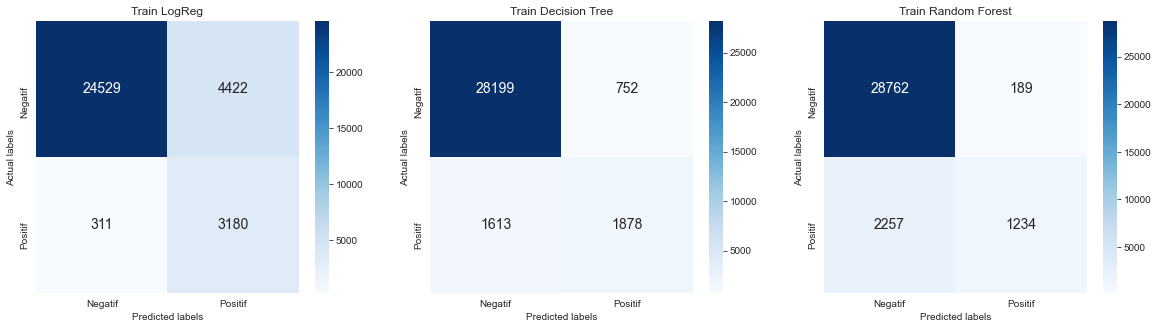

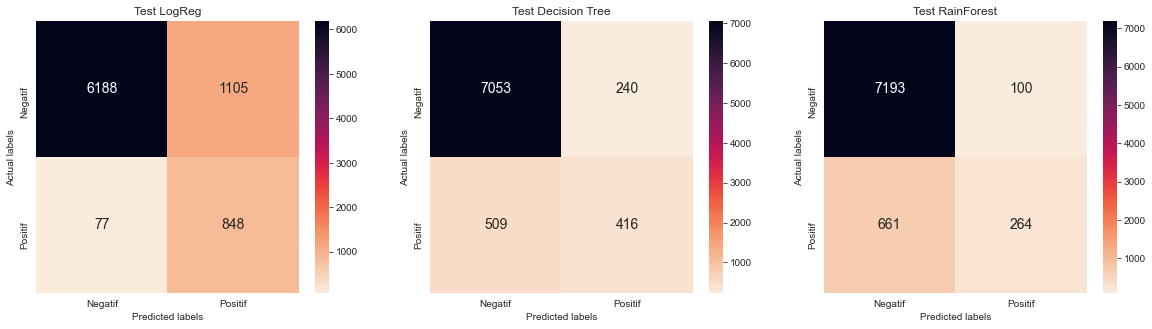

In [557]:

#plotting confusion matrix
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
logreg_matrix1= confusion_matrix(y_train_trimmed, y_pred_train_tuning_logreg)
ax = sns.heatmap(logreg_matrix1, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Train LogReg")

plt.subplot(1,3,2)
dt_matrix1= confusion_matrix(y_train_trimmed, y_pred_train_tuning_dt)
ax = sns.heatmap(dt_matrix1, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Train Decision Tree")

plt.subplot(1,3,3)
dt_matrix1= confusion_matrix(y_train_trimmed, y_pred_train_tuning_rnd)
ax = sns.heatmap(dt_matrix1, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Train Random Forest")

#plotting confusion matrix
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
logreg_matrix2= confusion_matrix(y_test, y_pred_test_tuning_logreg)
ax = sns.heatmap(logreg_matrix2, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Test LogReg")



plt.subplot(1,3,2)
dt_matrix2= confusion_matrix(y_test, y_pred_test_tuning_dt)
ax = sns.heatmap(dt_matrix2, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Test Decision Tree")

plt.subplot(1,3,3)
dt_matrix2= confusion_matrix(y_test, y_pred_test_tuning_rnd)
ax = sns.heatmap(dt_matrix2, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Test RainForest")

plt.show()

- Dari `Confusion Metrics` yang dihasilkan oleh model `tuned logistic regression`, `tuned decision tree`, dan `tuned random forest`(sebagai model dengan skor terendah) dapat kita tarik informasi bahwa:
    - Model `logistic regression` sangat baik untuk menebak kelas yang benar-benar positif atau telah berlangganan deposito berjangka dalam bank. Ini dibuktikan dengan jumlah nilai pada blok `true positive` hingga dua kali dibandingkan model lain. Bahkan model `logistic regression` hanya sedikit saja salah dalam memprediksi kesalahan yang seharusnya masuk kelas positive namun saat diprediksi ternyata negatif. Jika kita bandingkan dengan kelas lain dimana `Decision Tree` salah sebanyak 1613, sedangkan `random forest` lebih parah hingga mencapai angka 2257.
    - Namun model `logistic regression` sangat buruk untuk memprediksi kelas yang seharusnya negatif namun malah dianggap masuk ke dalam kelas `positif`
    - `tuned random forest` sangat baik untuk memprediksi kelas yang benar-benar negatif. Namun masih buruk saat memprediksi kelas `positif`, bahkan model ini lebih banyak menmprediksi kelas yang seharusnya positif malah dianggap negatif. 
    - Hal ini juga berlaku pada `tuned SVC` namun model ini masih sedikit lebih baik untuk menebak kelas yang `positif`, meskipun pada akhirnya jumlah kelas positif yang dianggap negatif masih lebih banyak dibandingkan yang benar-benar positif.
- Dalam kasus ini, hal yang perlu dipertimbangkan adalah sebisa mungkin kita hanya memiliki sedikit kesalahan untuk memprediksi kelas negatif yang seharusnya positif `(False Negative)` dan juga memiliki `True Positive` yang mendekati dengan jumlah aslinya. Hal ini dikarenakan tentu saja kita tidak ingin kehilangan nasabah yang sebenarnya sangat memiliki prospek tinggi untuk mengikuti deposito berjangka namun kita singkirkan atau tidak masukkan dalam daftar yang berhak ditawarkan kampanye atau promo bank lainnya di masa yang akan datang.
- Dari pertimbangan di atas, selain mempertimbangkan `f1 score` kita juga mempertimbangkan nilai `recall` yang dihasilkan oleh model terhadap kelas `positif/yes`. Oleh karena itu, `Logistic Regression` kita pilih sebagai model terbaik. Tidak hanya memiliki rata-rata `f1 score` yang paling baik setelah melalui tahap `cross validation` sebanyak 5 kali, Model ini juga memiliki nilai `recall` yang jauh mengungguli model-model lainnya.
- Nilai `f1 score` yang dihasilkan untuk model `Logistic regression` adalah 91/57 untuk Train set dan 91/59 untuk Test set.
- Nilai `Recall` yang dihasilkan `Logistic regression` adalah 85/91 untuk Train set dan 85/92 untuk Test set

In [566]:
y_test.value_counts()

0    7293
1     925
Name: y, dtype: int64

## **9. Model Inference**
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [489]:
df_inf['pdays'].isnull().sum()

98

In [516]:
df_inf['y'].replace(to_replace=dict(yes=1, no=0), inplace=True)

In [488]:
poutcome_inf_index = df_inf.query('poutcome=="nonexistent"').index
previous_inf_index = df_inf.query('previous==0').index
pdays_inf_index = df_inf.query('pdays!=pdays').index
pdays0_inf_index = df_inf.query('pdays!=pdays & previous==0').index

In [493]:
pdays_inf_diff = list(set(pdays_inf_index)-set(pdays0_inf_index))

In [494]:
df_inf['pdays'].loc[pdays_inf_diff] = 6

In [498]:
df_inf['pdays_cat'] = "Not Contacted"
df_inf['pdays_cat'][(df_inf['pdays']<=7)] = '<=7 days'
df_inf['pdays_cat'][(df_inf['pdays']>7)] = '>7 days'

In [500]:
# Split Numerical and Categorical Columns

data_inf_num = df_inf[num_columns]
data_inf_cat = df_inf[cat_columns]

In [504]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = scaler.transform(data_inf_num)
data_inf_cat_encoded = encoder.transform(data_inf_cat)

In [506]:
# Concatenate Numerical and Categorical Columns
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded.toarray()], axis=1)

In [668]:
# Predict Inference set

y_pred_inf = logreg_best.predict(data_inf_final)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Predicted[LogReg]'])


In [669]:
# Concate to Original Dataframe
df_inf_result = pd.concat([df_inf['y'], y_pred_inf], axis=1)

In [670]:
df_inf_result

,y,Predicted[LogReg]
0,1,1
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,0,0
98,0,0


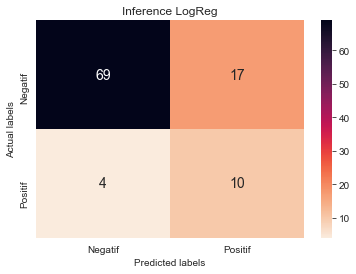

In [628]:
logreg_matrix3= confusion_matrix(df_inf['y'], y_pred_inf)
ax = sns.heatmap(logreg_matrix3, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Inference LogReg")
plt.show()

- Dengan mengaplikasikan model machine learning `tuned logistig regression` sebagai model yang paling baik diantara model lainnya, kita mendapatkan hasil bahwa:
    - dari 14 label aktual positif, model berhasil memprediksi 10 label yang benar-benar positif. Sedangkan 4 lainnya dianggap negatif oleh label
    - dari 86 label aktual negatif, odel berhasil memprediksi 69 label yang benar-benar negatif. Sedangkan 17 lainnya dianggap positif oleh label

<hr>


## **10. Conclusions**

### 10.1 Base Model

In [605]:
evaluation_metrics

,Model,"f1-score(No, Train)","f1-score(Yes, Train)","f1-score(No, Test)","f1-score(Yes, Test)"
0,Logistic Regression,0.95,0.48,0.95,0.59
1,SVM,0.96,0.50,0.95,0.49
2,Decision Tree,1.00,1.00,0.94,0.50
3,Random Forest,1.00,1.00,0.95,0.53
4,K Nearest Neighbor,0.96,0.62,0.95,0.50
5,Naive Bayes,0.88,0.40,0.88,0.44
6,Bagging Ensembles,0.95,0.42,0.95,0.44


- Dari hasil evaluasi `Base Model`, kita dapat menarik kesimpulan bahwa:
    - `Overfitting` terjadi pada model `Decision Tree` maupun `Random Forest`. Ini dikarenakan model dapat memprediksi secara sempurna untuk Train set, namun saat diujikan dengan Test set, model masih belum baik untuk menentukan kelas yang `true positive`. Dimana banyak label/kelas seharusnya yes/positif malah dianggap no/negatif oleh model ini. Sehingga nilai `recall` yang dihasilkan jauh lebih rendah dibandingkan `precision`-nya dan mengakibatkan `f1 score` juga ikutan rendah untuk label ini
    - `Naive Bayes` merupakan model yang paling buruk dalam memprediksi, dimana menghasilkan skor yang paling rendah dibandingkan model lainnya.
    - `SVM` merupakan dua model yang paling baik dalam memprediksi nasabah yang sekiranya mengikuti deposito berjangka ataupun yang tidak. Kemudian diikuti oleh `KNN` meskipun pada model `KNN` ini hampir mendekati `overfitting`, namun masih layak untuk diterima karena selisih yang belum terlalu jauh pada nilai akurasinya. 93% untuk Train set dan 90% untuk Train set.
    - Sangat wajar jika `f1 skor` yang dihasilkan pada tiap model lebih rendah untuk salah satu labelnya. Ini dikarenakan dataset yang tidak imbang antara tiap labelnya, sehingga label yang memiliki jumlah jauh lebih banyak dibandingkan label lainnya akan lebih dikenali oleh model machine learning namun cenderung lemah untuk mengenal label lainnya. Hal ini mengakibatkan label yang seharusnya positif banyak dianggap negatif oleh model, dimana hal ini disebut dengan `false negative`

### 10.2 Hyperparameter Tuned Model

In [634]:
tuned_evaluation_metrics

,Model,"f1-score(No, Train)","f1-score(Yes, Train)","f1-score(No, Test)","f1-score(Yes, Test)","recall(Yes, Train)","recall(Yes, Test)"
0,Tuned LogReg,0.91,0.57,0.91,0.59,0.91,0.92
1,Tuned SVC,0.99,0.90,0.94,0.55,0.85,0.55
2,Tuned Decision Tree,0.69,0.61,0.95,0.53,0.54,0.45
4,Tuned K Nearest Neighbor,1.00,1.00,0.94,0.50,1.00,0.46
5,Tuned Naive Bayes,0.91,0.42,0.91,0.47,0.55,0.62
6,Tuned Bagging Ensemble,0.95,0.46,0.95,0.49,0.36,0.39


- Dari hasil evaluasi model yang telah dipilih `hyperparameter`-nya melalui `GridSearch` dan `CrossValidation`, kita dapat menarik kesimpulan bahwa:
    - Seperti yang telah dibahas sebelumnya pada bagian 8.2.8 dalam menentukan model mana yang terbaik dengan pertimbangan yang sudah disebutkan, yang dimana hal-hal yang dipertimbangkan selain model mendapatkan `f1 score` yang paling baik, namun juga memiliki nilai `recall` yang paling tinggi dibandingkan model lainnya
    - Ternyata spesifikasi ini dimiliki oleh model `Logistic Regression`, dimana model ini sangat baik sekali untuk menempatkan label yang positif di dalam kelompok yang positif juga. Meskipun ada harga yang harus dibayar, dimana model ini kebalikan dari model-model lainnya. Model ini memiliki performa yang buruk dalam menentukan label yang negatif, sehingga banyak label negatif yang justru masuk ke dalam kelas positif **(Lihat visual grafik dibawah)**.
    - Namun jika kita menilik dari kasus nyata, hal ini masih bisa ditolerir karena bank pada akhirnya mendapatkan calon nasabah yang mengikuti deposito berjangka lebih banyak jika mengacu pada model ini. Tetapi hal ini juga terdapat sisi negatifnya, dimana karyawan atau pegawai yang bersangkutan atau memiliki tanggung jawab dalam menghubungi nasabah harus kerja lebih ekstra dan lebih berat. Ini dikarenakan jumlah nasabah yang harus dihubungi jauh lebih banyak dalam kasus jika nasabah yang harus dihubungi pada kampanye selanjutnya, hanyalah nasabah-nasabah yang belabel positif pada prediksi model `machine learning` ini.
    - Sedangkan pada model `SVC` memiliki kekurangan pada nilai `recall`-nya. Mungkin jika saja model ini dikembangankan dan difokuskan lebih jauh, dapat menghasilkan nilai keseluruhan yang tinggi dibandingkan dengan `logistic regression`. Namun karena keterbatasan waktu dan sumber daya dikarenakan komputasi `SVC` yang memakan waktu dan sumber daya yang besar. Maka hasil inilah yang sekiranya sudah cukup untuk mewakili model `SVC`

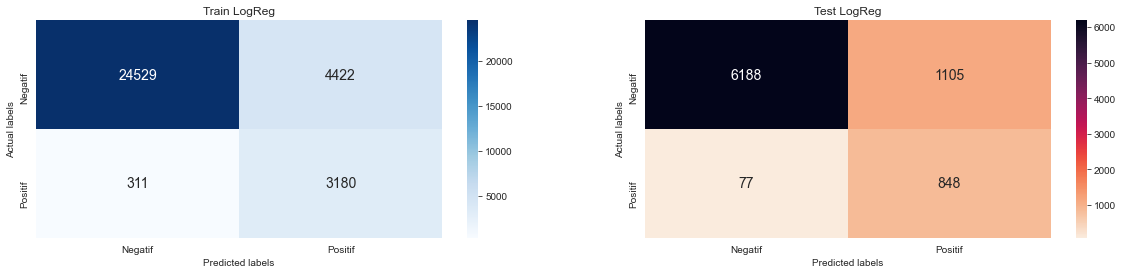

In [640]:
#plotting confusion matrix
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
logreg_matrix1= confusion_matrix(y_train_trimmed, y_pred_train_tuning_logreg)
ax = sns.heatmap(logreg_matrix1, annot=True, cmap='Blues', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Train LogReg")

plt.subplot(1,2,2)
logreg_matrix2= confusion_matrix(y_test, y_pred_test_tuning_logreg)
ax = sns.heatmap(logreg_matrix2, annot=True, cmap='rocket_r', fmt='g', annot_kws={"fontsize":14})
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_xticklabels(["Negatif", "Positif"])
ax.set_yticklabels(["Negatif", "Positif"])
plt.title("Test LogReg")

plt.show()